<a href="https://colab.research.google.com/github/astrolight23/ML_project/blob/main/EnergyEfficientAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/ml_datasets/iot_system_data.csv'
df = pd.read_csv(file_path)

In [ ]:
print(df.head())

             timestamp device_id  energy_consumed device_type location  \
0  2020-01-01 00:00:00  device_4             4.64      heater   Zone 1   
1  2020-01-01 00:05:00  device_1             4.56      heater   Zone 3   
2  2020-01-01 00:10:00  device_1             2.05         fan   Zone 4   
3  2020-01-01 00:15:00  device_3             0.69         fan   Zone 4   
4  2020-01-01 00:20:00  device_1             0.75         fan   Zone 2   

   data_size  latency  error_rate protocol_type  air_quality  ...  \
0        886       49       0.096          HTTP          150  ...   
1        285        8       0.005          HTTP          118  ...   
2       2639       30       0.017          CoAP           97  ...   
3        567       27       0.068          MQTT          129  ...   
4       4349       43       0.086          CoAP          133  ...   

   transaction_id  transaction_status  block_hash node_id validation_status  \
0           txn_1             pending  block_9067  node_1    

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           1000 non-null   object 
 1   device_id           1000 non-null   object 
 2   energy_consumed     1000 non-null   float64
 3   device_type         1000 non-null   object 
 4   location            1000 non-null   object 
 5   data_size           1000 non-null   int64  
 6   latency             1000 non-null   int64  
 7   error_rate          1000 non-null   float64
 8   protocol_type       1000 non-null   object 
 9   air_quality         1000 non-null   int64  
 10  temperature         1000 non-null   float64
 11  humidity            1000 non-null   int64  
 12  traffic_flow        1000 non-null   int64  
 13  transaction_id      1000 non-null   object 
 14  transaction_status  1000 non-null   object 
 15  block_hash          1000 non-null   object 
 16  node_id

In [ ]:
df.columns

Index(['timestamp', 'device_id', 'energy_consumed', 'device_type', 'location',
       'data_size', 'latency', 'error_rate', 'protocol_type', 'air_quality',
       'temperature', 'humidity', 'traffic_flow', 'transaction_id',
       'transaction_status', 'block_hash', 'node_id', 'validation_status',
       'model_version', 'training_time', 'model_accuracy',
       'communication_cost', 'system_status'],
      dtype='object')

In [ ]:
print(df.isnull().sum())

timestamp             0
device_id             0
energy_consumed       0
device_type           0
location              0
data_size             0
latency               0
error_rate            0
protocol_type         0
air_quality           0
temperature           0
humidity              0
traffic_flow          0
transaction_id        0
transaction_status    0
block_hash            0
node_id               0
validation_status     0
model_version         0
training_time         0
model_accuracy        0
communication_cost    0
system_status         0
dtype: int64


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [ ]:
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicates: 0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['device_id', 'device_type', 'location', 'protocol_type',
              'transaction_id', 'transaction_status', 'block_hash',
              'node_id', 'validation_status']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['energy_efficiency'] = df['energy_consumed'] / df['data_size']


In [ ]:

for col in df.select_dtypes(include='object').columns:
    if col != 'timestamp':
        df[col] = LabelEncoder().fit_transform(df[col])


In [ ]:
target = 'energy_consumed'

X = df.drop(columns=['timestamp', target])
y = df[target]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)

lgb_preds = lgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, lgb_preds))
print("LightGBM RMSE:", rmse)


LightGBM RMSE: 0.18218994700441393


In [ ]:
lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    callbacks=[lgb.log_evaluation(period=10)]
)


[10]	valid_0's rmse: 0.635622	valid_0's l2: 0.404015
[20]	valid_0's rmse: 0.33865	valid_0's l2: 0.114684
[30]	valid_0's rmse: 0.236418	valid_0's l2: 0.0558934
[40]	valid_0's rmse: 0.203988	valid_0's l2: 0.0416111
[50]	valid_0's rmse: 0.19085	valid_0's l2: 0.0364236
[60]	valid_0's rmse: 0.188408	valid_0's l2: 0.0354977
[70]	valid_0's rmse: 0.185909	valid_0's l2: 0.0345622
[80]	valid_0's rmse: 0.185543	valid_0's l2: 0.0344261
[90]	valid_0's rmse: 0.183153	valid_0's l2: 0.0335451
[100]	valid_0's rmse: 0.18219	valid_0's l2: 0.0331932


LGBMRegressor()

In [ ]:
X_train = X_train.drop(['transaction_id', 'block_hash'], axis=1)
X_test = X_test.drop(['transaction_id', 'block_hash'], axis=1)


In [ ]:
categorical_cols = ['device_id', 'device_type', 'location', 'protocol_type',
                    'transaction_status', 'node_id', 'validation_status',
                    'model_version', 'system_status', 'hour', 'dayofweek']

for col in categorical_cols:
    X_train[col] = X_train[col].astype('category')
    X_test[col] = X_test[col].astype('category')


In [ ]:
lgb_model = lgb.LGBMRegressor(
    max_depth=5,
    num_leaves=31,
    min_child_samples=5,
    min_split_gain=0.001,
    n_estimators=100
)

lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    callbacks=[lgb.log_evaluation(period=10)]
)


/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[10]	valid_0's rmse: 0.663515	valid_0's l2: 0.440252
[20]	valid_0's rmse: 0.392142	valid_0's l2: 0.153776
[30]	valid_0's rmse: 0.286982	valid_0's l2: 0.0823585
[40]	valid_0's rmse: 0.234842	valid_0's l2: 0.0551509
[50]	valid_0's rmse: 0.21719	valid_0's l2: 0.0471717
[60]	valid_0's rmse: 0.205926	valid_0's l2: 0.0424056
[70]	valid_0's rmse: 0.203327	valid_0's l2: 0.0413419
[80]	valid_0's rmse: 0.199776	valid_0's l2: 0.0399103
[90]	valid_0's rmse: 0.196255	valid_0's l2: 0.0385159
[100]	valid_0's rmse: 0.19496	valid_0's l2: 0.0380094


LGBMRegressor(max_depth=5, min_child_samples=5, min_split_gain=0.001)

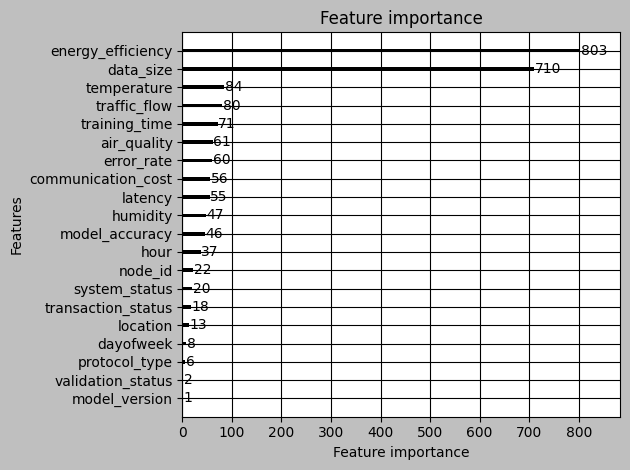

In [ ]:
import matplotlib.pyplot as plt
lgb.plot_importance(lgb_model, max_num_features=20)
plt.tight_layout()
plt.show()


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

lgb_model = lgb.LGBMRegressor(
    max_depth=5,
    num_leaves=31,
    min_child_samples=5,
    min_split_gain=0.001,
    n_estimators=100,
    learning_rate=0.1
)

lgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='rmse',
    callbacks=[lgb.log_evaluation(period=10)]
)

lgb_preds = lgb_model.predict(X_test)


/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.11/dist-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[10]	valid_0's rmse: 0.663515	valid_0's l2: 0.440252
[20]	valid_0's rmse: 0.392142	valid_0's l2: 0.153776
[30]	valid_0's rmse: 0.286982	valid_0's l2: 0.0823585
[40]	valid_0's rmse: 0.234842	valid_0's l2: 0.0551509
[50]	valid_0's rmse: 0.21719	valid_0's l2: 0.0471717
[60]	valid_0's rmse: 0.205926	valid_0's l2: 0.0424056
[70]	valid_0's rmse: 0.203327	valid_0's l2: 0.0413419
[80]	valid_0's rmse: 0.199776	valid_0's l2: 0.0399103
[90]	valid_0's rmse: 0.196255	valid_0's l2: 0.0385159
[100]	valid_0's rmse: 0.19496	valid_0's l2: 0.0380094


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE manually
lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_preds))
print(" LightGBM RMSE:", lgb_rmse)


 LightGBM RMSE: 0.19496011466189866


In [ ]:
!pip install catboost



In [ ]:
from catboost import CatBoostRegressor, Pool
import numpy as np
catboost_cat_features = [X_train.columns.get_loc(col) for col in categorical_cols]
train_pool = Pool(X_train, y_train, cat_features=catboost_cat_features)
test_pool = Pool(X_test, y_test, cat_features=catboost_cat_features)
cat_model = CatBoostRegressor(
    depth=5,
    learning_rate=0.1,
    iterations=100,
    verbose=10
)
cat_model.fit(train_pool, eval_set=test_pool)
cat_preds = cat_model.predict(X_test)
cat_rmse = np.sqrt(mean_squared_error(y_test, cat_preds))
print("CatBoost RMSE:", cat_rmse)

0:	learn: 1.3233284	test: 1.3648718	best: 1.3648718 (0)	total: 12.9ms	remaining: 1.28s
10:	learn: 0.8711013	test: 0.9698521	best: 0.9698521 (10)	total: 81ms	remaining: 656ms
20:	learn: 0.6579239	test: 0.7579410	best: 0.7579410 (20)	total: 160ms	remaining: 602ms
30:	learn: 0.5423103	test: 0.6401990	best: 0.6401990 (30)	total: 221ms	remaining: 491ms
40:	learn: 0.4647051	test: 0.5568457	best: 0.5568457 (40)	total: 252ms	remaining: 363ms
50:	learn: 0.4093068	test: 0.4921381	best: 0.4921381 (50)	total: 276ms	remaining: 265ms
60:	learn: 0.3561240	test: 0.4379082	best: 0.4379082 (60)	total: 298ms	remaining: 190ms
70:	learn: 0.3041493	test: 0.3874352	best: 0.3874352 (70)	total: 319ms	remaining: 130ms
80:	learn: 0.2673772	test: 0.3473101	best: 0.3473101 (80)	total: 341ms	remaining: 80.1ms
90:	learn: 0.2368936	test: 0.3144850	best: 0.3144850 (90)	total: 366ms	remaining: 36.2ms
99:	learn: 0.2150061	test: 0.2929053	best: 0.2929053 (99)	total: 386ms	remaining: 0us

bestTest = 0.2929053242
bestItera

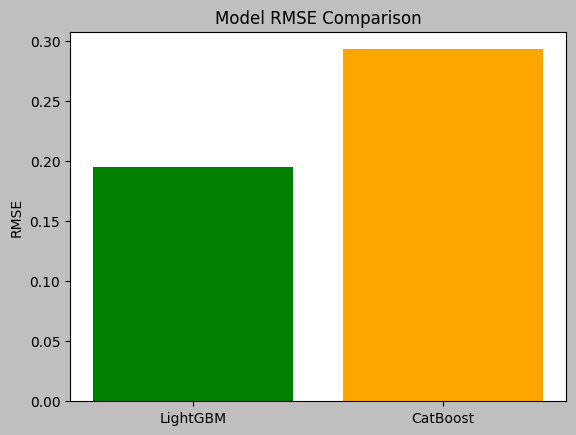

In [ ]:
import matplotlib.pyplot as plt

models = ['LightGBM', 'CatBoost']
rmse_scores = [lgb_rmse, cat_rmse]

plt.bar(models, rmse_scores, color=['green', 'orange'])
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.show()


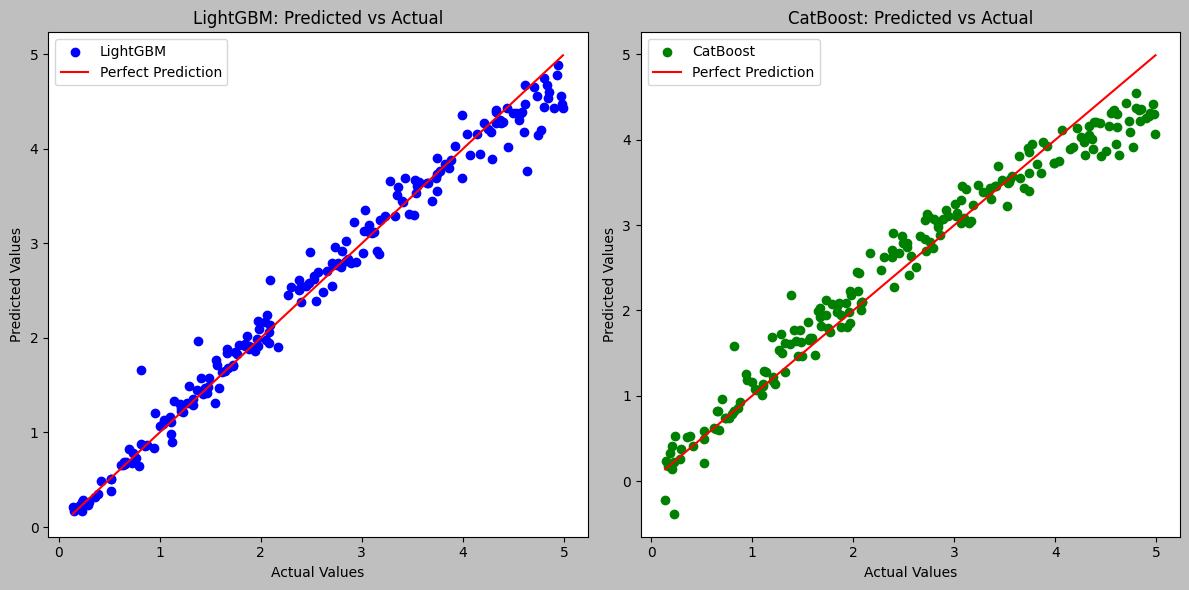

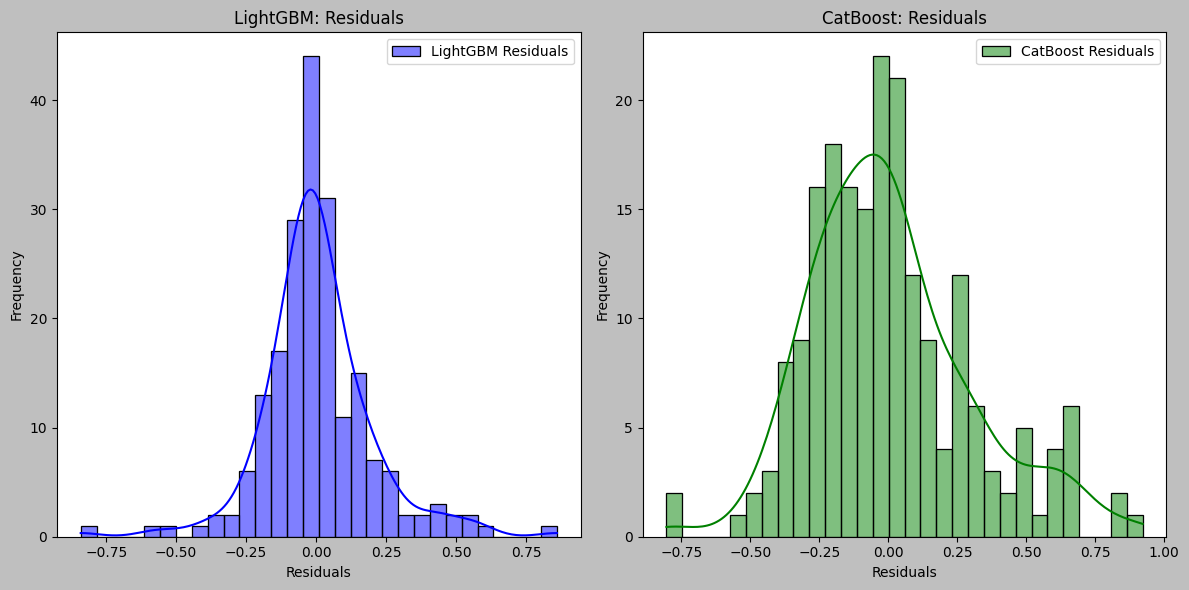

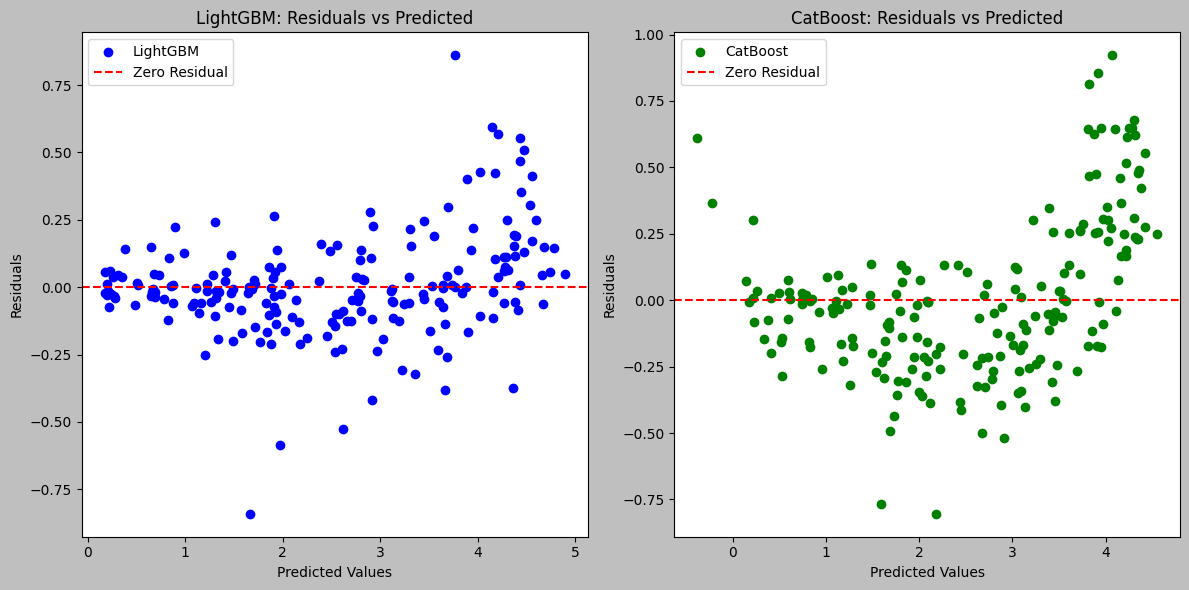

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
lgb_preds = lgb_model.predict(X_test)
cat_preds = cat_model.predict(X_test)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lgb_preds, color='b', label='LightGBM')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', label='Perfect Prediction')
plt.title('LightGBM: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, cat_preds, color='g', label='CatBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', label='Perfect Prediction')
plt.title('CatBoost: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

lgb_residuals = y_test - lgb_preds
catboost_residuals = y_test - cat_preds

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(lgb_residuals, bins=30, kde=True, color='b', label='LightGBM Residuals')
plt.title('LightGBM: Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(catboost_residuals, bins=30, kde=True, color='g', label='CatBoost Residuals')
plt.title('CatBoost: Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(lgb_preds, lgb_residuals, color='b', label='LightGBM')
plt.axhline(0, color='r', linestyle='--', label='Zero Residual')
plt.title('LightGBM: Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(cat_preds, catboost_residuals, color='g', label='CatBoost')
plt.axhline(0, color='r', linestyle='--', label='Zero Residual')
plt.title('CatBoost: Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import r2_score
lgb_r2 = r2_score(y_test, lgb_preds)
print("LightGBM R² Score:", lgb_r2)
cat_r2 = r2_score(y_test, cat_preds)
print("CatBoost R² Score:", cat_r2)


LightGBM R² Score: 0.981098243314475
CatBoost R² Score: 0.9573356462632705


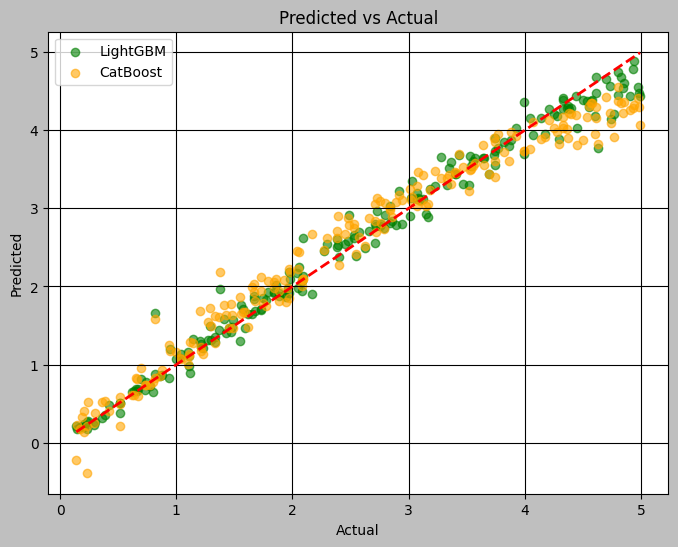

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lgb_preds, color='green', label='LightGBM', alpha=0.6)
plt.scatter(y_test, cat_preds, color='orange', label='CatBoost', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.legend()
plt.grid(True)
plt.show()


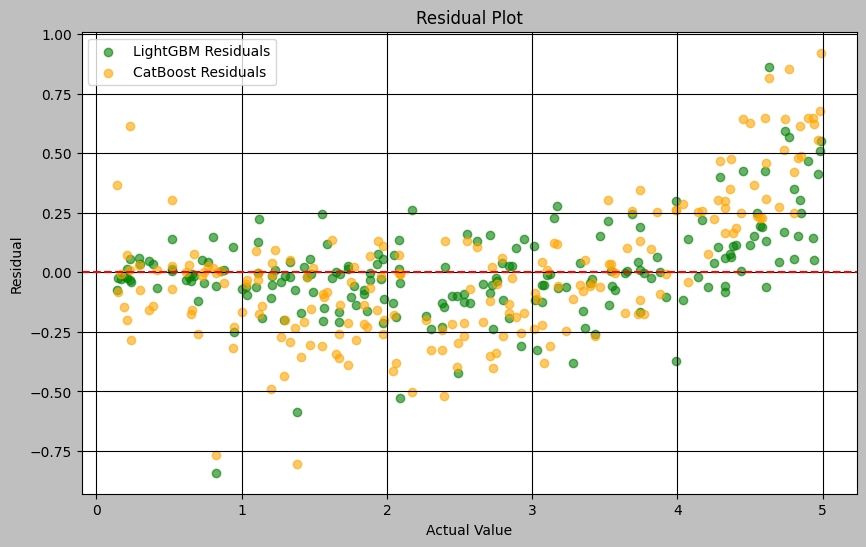

In [ ]:
lgb_residuals = y_test - lgb_preds
cat_residuals = y_test - cat_preds

plt.figure(figsize=(10, 6))
plt.scatter(y_test, lgb_residuals, color='green', label='LightGBM Residuals', alpha=0.6)
plt.scatter(y_test, cat_residuals, color='orange', label='CatBoost Residuals', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Value')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()


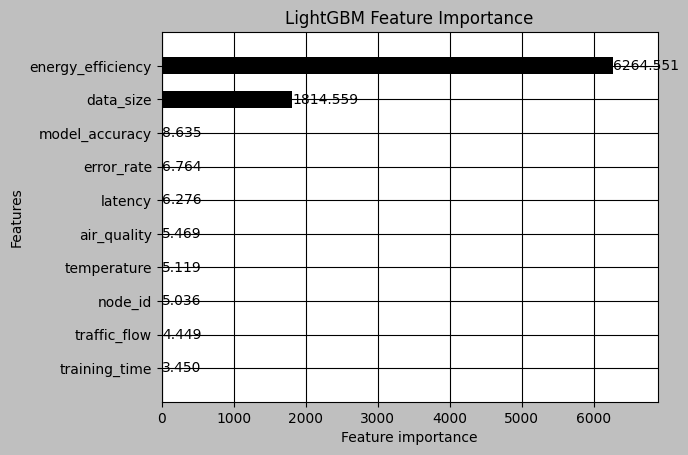

In [ ]:
import lightgbm as lgb

lgb.plot_importance(lgb_model, max_num_features=10, importance_type='gain', height=0.5)
plt.title("LightGBM Feature Importance")
plt.show()


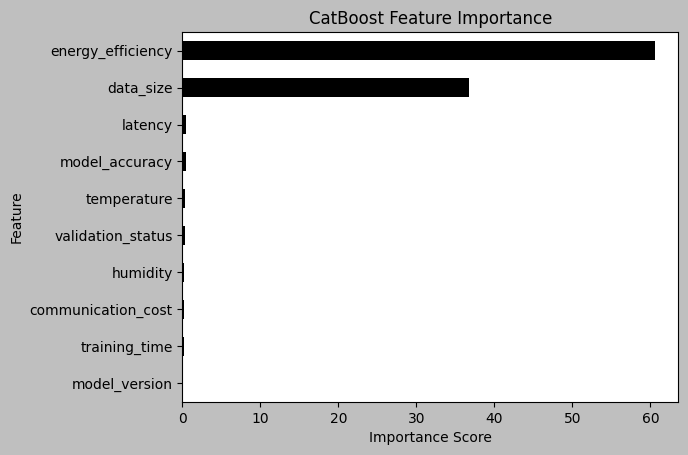

In [ ]:
import pandas as pd

feature_importance = cat_model.get_feature_importance()
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df.sort_values(by='Importance', ascending=False).head(10).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# LightGBM
lgb_scores = cross_val_score(lgb_model, X, y, cv=5, scoring='r2')
print("LightGBM CV R² mean:", lgb_scores.mean())

# CatBoost
cat_scores = cross_val_score(cat_model, X, y, cv=5, scoring='r2')
print("CatBoost CV R² mean:", cat_scores.mean())


LightGBM CV R² mean: 0.981792374129521
0:	learn: 1.3252688	total: 4.76ms	remaining: 471ms
10:	learn: 0.8654803	total: 86.3ms	remaining: 699ms
20:	learn: 0.6518342	total: 161ms	remaining: 606ms
30:	learn: 0.5231818	total: 215ms	remaining: 478ms
40:	learn: 0.4381047	total: 262ms	remaining: 378ms
50:	learn: 0.3742306	total: 340ms	remaining: 326ms
60:	learn: 0.3183172	total: 395ms	remaining: 253ms
70:	learn: 0.2710821	total: 457ms	remaining: 187ms
80:	learn: 0.2331571	total: 514ms	remaining: 121ms
90:	learn: 0.2044319	total: 561ms	remaining: 55.5ms
99:	learn: 0.1828187	total: 608ms	remaining: 0us
0:	learn: 1.3105605	total: 8.14ms	remaining: 806ms
10:	learn: 0.8703786	total: 67.3ms	remaining: 545ms
20:	learn: 0.6562453	total: 150ms	remaining: 566ms
30:	learn: 0.5226064	total: 208ms	remaining: 463ms
40:	learn: 0.4334754	total: 253ms	remaining: 364ms
50:	learn: 0.3767477	total: 317ms	remaining: 305ms
60:	learn: 0.3311052	total: 384ms	remaining: 246ms
70:	learn: 0.2833688	total: 424ms	remainin

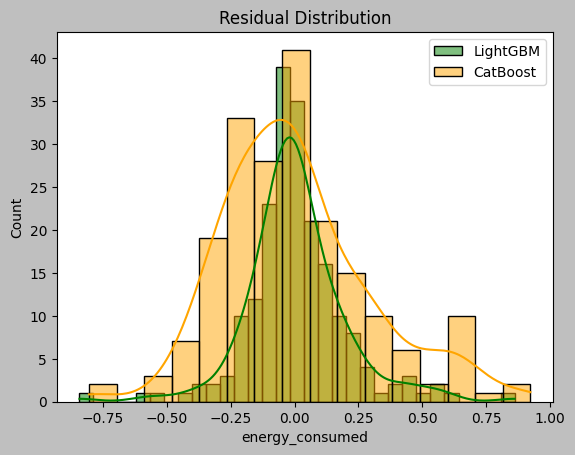

In [ ]:
import seaborn as sns

sns.histplot(lgb_residuals, kde=True, color='green', label='LightGBM')
sns.histplot(cat_residuals, kde=True, color='orange', label='CatBoost')
plt.legend()
plt.title('Residual Distribution')
plt.show()


In [ ]:


import numpy as np
import pandas as pd
from catboost import Pool

def predict_and_recommend(test_input, lgb_model, cat_model, X_train, categorical_cols, lgb_rmse, cat_rmse, n_noise_samples=10, noise_level=0.01):

    # Validate test_input keys
    missing_cols = [col for col in X_train.columns if col not in test_input]
    if missing_cols:
        raise ValueError(f"Test input missing columns: {missing_cols}")

    # Convert test input to DataFrame
    input_df = pd.DataFrame([test_input], columns=X_train.columns)

    # Match X_train dtypes and categories
    for col in X_train.columns:
        if col in categorical_cols:
            if X_train[col].dtype.name == 'category':
                input_df[col] = input_df[col].astype('category')
                input_df[col] = input_df[col].cat.set_categories(X_train[col].cat.categories)
            else:
                input_df[col] = input_df[col].astype(X_train[col].dtype)
        else:
            input_df[col] = input_df[col].astype(X_train[col].dtype)

    # Fill missing numerical values
    numerical_cols = [col for col in X_train.columns if col not in categorical_cols]
    input_df[numerical_cols] = input_df[numerical_cols].fillna(X_train[numerical_cols].mean())

    # Predict with LightGBM
    lgb_pred = lgb_model.predict(input_df)[0]

    # Predict with CatBoost using Pool
    cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_cols]
    input_pool = Pool(input_df, cat_features=cat_features_indices)
    cat_pred = cat_model.predict(input_pool)[0]

    # Recommend based on RMSE
    recommended_model = 'LightGBM' if lgb_rmse < cat_rmse else 'CatBoost'

    # Compute prediction confidence (variance with noise on numerical features)
    lgb_noisy_preds = []
    cat_noisy_preds = []
    for _ in range(n_noise_samples):
        noisy_df = input_df.copy()
        for col in numerical_cols:
            std = X_train[col].std()
            noisy_df[col] += np.random.normal(0, noise_level * std)
        # Ensure categorical columns retain correct dtype
        for col in categorical_cols:
            if X_train[col].dtype.name == 'category':
                noisy_df[col] = noisy_df[col].astype('category')
                noisy_df[col] = noisy_df[col].cat.set_categories(X_train[col].cat.categories)
            else:
                noisy_df[col] = noisy_df[col].astype(X_train[col].dtype)
        # LightGBM prediction
        lgb_noisy_preds.append(lgb_model.predict(noisy_df)[0])
        # CatBoost prediction
        noisy_pool = Pool(noisy_df, cat_features=cat_features_indices)
        cat_noisy_preds.append(cat_model.predict(noisy_pool)[0])
    lgb_variance = np.var(lgb_noisy_preds)
    cat_variance = np.var(cat_noisy_preds)
    lgb_confidence = 1 / (lgb_variance + 1e-6)
    cat_confidence = 1 / (cat_variance + 1e-6)

    return {
        'LightGBM_Prediction': lgb_pred,
        'CatBoost_Prediction': cat_pred,
        'LightGBM_Test_RMSE': lgb_rmse,
        'CatBoost_Test_RMSE': cat_rmse,
        'LightGBM_Pred_Variance': lgb_variance,
        'CatBoost_Pred_Variance': cat_variance,
        'LightGBM_Pred_Confidence': lgb_confidence,
        'CatBoost_Pred_Confidence': cat_confidence,
        'Recommended_Model': recommended_model
    }

# Example test input (based on dataset ranges)
test_input = {
    'device_id': 1,  # Label-encoded (e.g., device_1)
    'device_type': 1,  # Label-encoded (e.g., heater)
    'location': 2,  # Label-encoded (e.g., Zone 3)
    'data_size': 1000,
    'latency': 30,
    'error_rate': 0.05,
    'protocol_type': 1,  # Label-encoded (e.g., HTTP)
    'air_quality': 120,
    'temperature': 22.5,
    'humidity': 60,
    'traffic_flow': 500,
    'transaction_status': 1,  # Label-encoded (e.g., pending)
    'node_id': 1,  # Label-encoded (e.g., node_1)
    'validation_status': 1,  # Label-encoded (e.g., successful)
    'model_version': 2,
    'training_time': 180,
    'model_accuracy': 0.85,
    'communication_cost': 0.05,
    'system_status': 2,
    'hour': 12,
    'dayofweek': 3,
    'energy_efficiency': 0.005  # energy_consumed / data_size
}
result = predict_and_recommend(test_input, lgb_model, cat_model, X_train, categorical_cols, lgb_rmse, cat_rmse)
print("\nTest Input Evaluation:")
for key, value in result.items():
    print(f"{key}: {value:.6f}" if isinstance(value, float) else f"{key}: {value}")



Test Input Evaluation:
LightGBM_Prediction: 4.332692
CatBoost_Prediction: 4.147196
LightGBM_Test_RMSE: 0.194960
CatBoost_Test_RMSE: 0.292905
LightGBM_Pred_Variance: 0.000065
CatBoost_Pred_Variance: 0.001953
LightGBM_Pred_Confidence: 15119.357596
CatBoost_Pred_Confidence: 511.844651
Recommended_Model: LightGBM


In [ ]:
results = {
    'test_input_result': result
}
np.save('test_input_results.npy', results)
print("Results saved to test_input_results.npy")

# Download results
from google.colab import files
files.download('test_input_results.npy')

Results saved to test_input_results.npy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

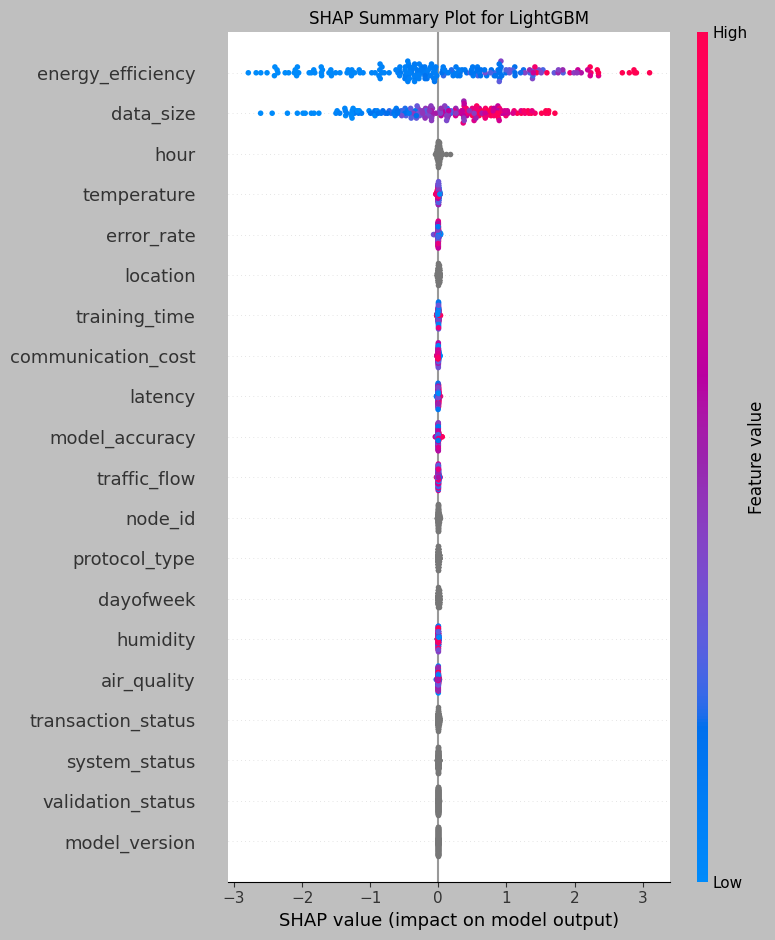

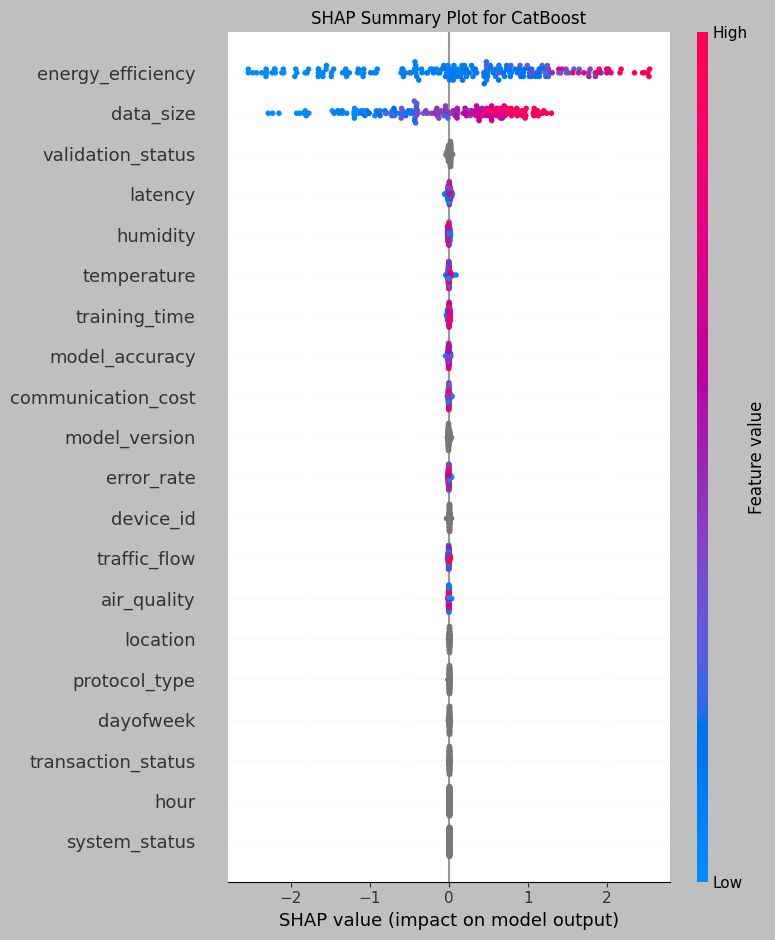


Test Input Evaluation with SHAP:
LightGBM_Prediction: 4.332692
CatBoost_Prediction: 4.147196
LightGBM_Test_RMSE: 0.194960
CatBoost_Test_RMSE: 0.292905
LightGBM_Pred_Variance: 0.000078
CatBoost_Pred_Variance: 0.001508
LightGBM_Pred_Confidence: 12714.477729
CatBoost_Pred_Confidence: 662.880387
Recommended_Model: LightGBM
LightGBM_SHAP_Top_Features: [('energy_efficiency', np.float64(2.132964448533254)), ('data_size', np.float64(-0.27521765188031955)), ('latency', np.float64(-0.016816195013257252))]
CatBoost_SHAP_Top_Features: [('energy_efficiency', np.float64(2.067837285867549)), ('data_size', np.float64(-0.38869163745361346)), ('validation_status', np.float64(-0.016787132506008853))]


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import Pool
from google.colab import files

# Initialize SHAP for LightGBM
lgb_explainer = shap.TreeExplainer(lgb_model)
lgb_shap_values = lgb_explainer.shap_values(X_test)

# Initialize SHAP for CatBoost
cat_explainer = shap.TreeExplainer(cat_model)
cat_shap_values = cat_explainer.shap_values(Pool(X_test, cat_features=[X_test.columns.get_loc(col) for col in categorical_cols]))

# SHAP Summary Plot for LightGBM
plt.figure()
shap.summary_plot(lgb_shap_values, X_test, show=False)
plt.title("SHAP Summary Plot for LightGBM")
plt.tight_layout()
plt.savefig('lgb_shap_summary.png')
plt.show()

# SHAP Summary Plot for CatBoost
plt.figure()
shap.summary_plot(cat_shap_values, X_test, show=False)
plt.title("SHAP Summary Plot for CatBoost")
plt.tight_layout()
plt.savefig('cat_shap_summary.png')
plt.show()

# Update predict_and_recommend to include SHAP for test input
def predict_and_recommend(test_input, lgb_model, cat_model, X_train, categorical_cols, lgb_rmse, cat_rmse, lgb_explainer, cat_explainer, n_noise_samples=10, noise_level=0.01):

    # Validate test_input
    missing_cols = [col for col in X_train.columns if col not in test_input]
    if missing_cols:
        raise ValueError(f"Test input missing columns: {missing_cols}")

    # Convert to DataFrame
    input_df = pd.DataFrame([test_input], columns=X_train.columns)

    # Match X_train dtypes
    for col in X_train.columns:
        if col in categorical_cols:
            if X_train[col].dtype.name == 'category':
                input_df[col] = input_df[col].astype('category')
                input_df[col] = input_df[col].cat.set_categories(X_train[col].cat.categories)
            else:
                input_df[col] = input_df[col].astype(X_train[col].dtype)
        else:
            input_df[col] = input_df[col].astype(X_train[col].dtype)

    # Fill numerical missing values
    numerical_cols = [col for col in X_train.columns if col not in categorical_cols]
    input_df[numerical_cols] = input_df[numerical_cols].fillna(X_train[numerical_cols].mean())

    # Predict
    lgb_pred = lgb_model.predict(input_df)[0]
    cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_cols]
    input_pool = Pool(input_df, cat_features=cat_features_indices)
    cat_pred = cat_model.predict(input_pool)[0]

    # SHAP explanations
    lgb_shap = lgb_explainer.shap_values(input_df)[0]
    cat_shap = cat_explainer.shap_values(input_pool)[0]
    lgb_shap_dict = {col: val for col, val in zip(X_train.columns, lgb_shap)}
    cat_shap_dict = {col: val for col, val in zip(X_train.columns, cat_shap)}

    # Recommend based on RMSE
    recommended_model = 'LightGBM' if lgb_rmse < cat_rmse else 'CatBoost'

    # Compute confidence
    lgb_noisy_preds = []
    cat_noisy_preds = []
    for _ in range(n_noise_samples):
        noisy_df = input_df.copy()
        for col in numerical_cols:
            std = X_train[col].std()
            noisy_df[col] += np.random.normal(0, noise_level * std)
        for col in categorical_cols:
            if X_train[col].dtype.name == 'category':
                noisy_df[col] = noisy_df[col].astype('category')
                noisy_df[col] = noisy_df[col].cat.set_categories(X_train[col].cat.categories)
            else:
                noisy_df[col] = noisy_df[col].astype(X_train[col].dtype)
        lgb_noisy_preds.append(lgb_model.predict(noisy_df)[0])
        noisy_pool = Pool(noisy_df, cat_features=cat_features_indices)
        cat_noisy_preds.append(cat_model.predict(noisy_pool)[0])
    lgb_variance = np.var(lgb_noisy_preds)
    cat_variance = np.var(cat_noisy_preds)
    lgb_confidence = 1 / (lgb_variance + 1e-6)
    cat_confidence = 1 / (cat_variance + 1e-6)

    # Identify energy spike contributors
    top_lgb_features = sorted(lgb_shap_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:3]
    top_cat_features = sorted(cat_shap_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:3]

    return {
        'LightGBM_Prediction': lgb_pred,
        'CatBoost_Prediction': cat_pred,
        'LightGBM_Test_RMSE': lgb_rmse,
        'CatBoost_Test_RMSE': cat_rmse,
        'LightGBM_Pred_Variance': lgb_variance,
        'CatBoost_Pred_Variance': cat_variance,
        'LightGBM_Pred_Confidence': lgb_confidence,
        'CatBoost_Pred_Confidence': cat_confidence,
        'Recommended_Model': recommended_model,
        'LightGBM_SHAP_Top_Features': top_lgb_features,
        'CatBoost_SHAP_Top_Features': top_cat_features
    }

# Run with previous test input
test_input = {
    'device_id': 1, 'device_type': 1, 'location': 2, 'data_size': 1000, 'latency': 30,
    'error_rate': 0.05, 'protocol_type': 1, 'air_quality': 120, 'temperature': 22.5,
    'humidity': 60, 'traffic_flow': 500, 'transaction_status': 1, 'node_id': 1,
    'validation_status': 1, 'model_version': 2, 'training_time': 180,
    'model_accuracy': 0.85, 'communication_cost': 0.05, 'system_status': 2,
    'hour': 12, 'dayofweek': 3, 'energy_efficiency': 0.005
}
result = predict_and_recommend(test_input, lgb_model, cat_model, X_train, categorical_cols, lgb_rmse, cat_rmse, lgb_explainer, cat_explainer)
print("\nTest Input Evaluation with SHAP:")
for key, value in result.items():
    if isinstance(value, float):
        print(f"{key}: {value:.6f}")
    else:
        print(f"{key}: {value}")

# Save results

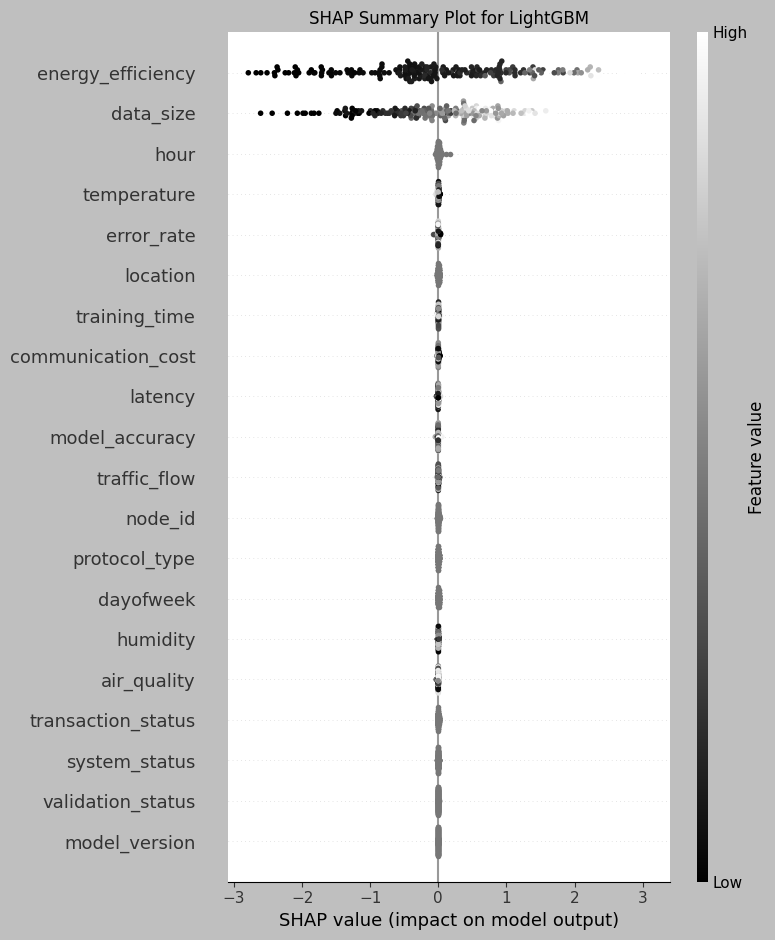

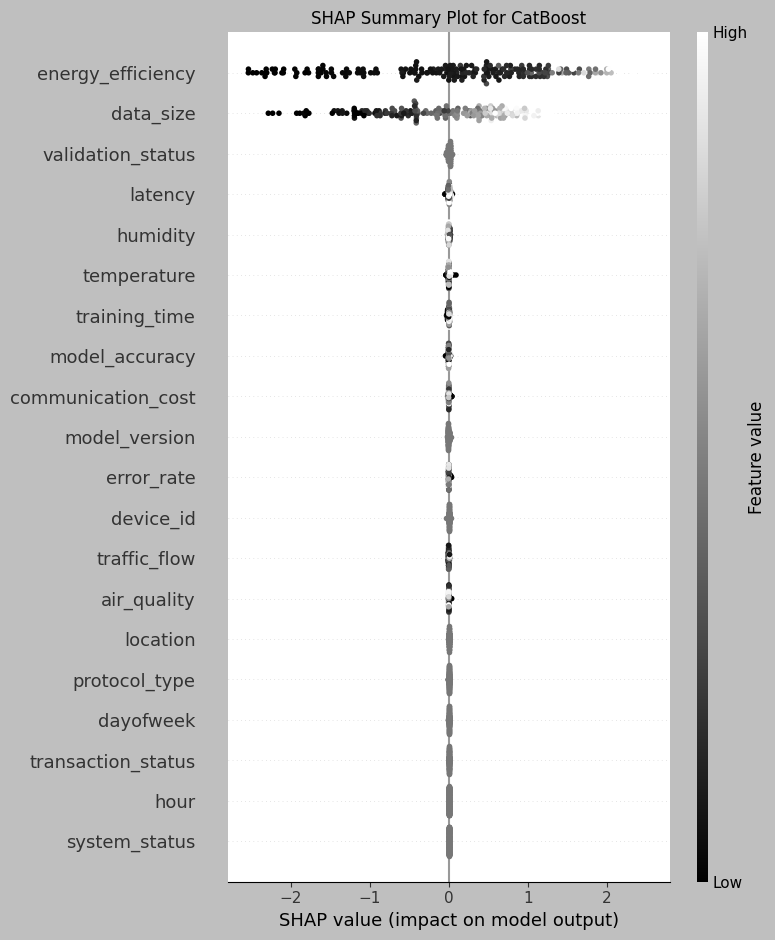


Test Input Evaluation with SHAP:
LightGBM_Prediction: 4.332692
CatBoost_Prediction: 4.147196
LightGBM_Test_RMSE: 0.194960
CatBoost_Test_RMSE: 0.292905
LightGBM_Pred_Variance: 0.000098
CatBoost_Pred_Variance: 0.001714
LightGBM_Pred_Confidence: 10130.627926
CatBoost_Pred_Confidence: 583.203366
Recommended_Model: LightGBM
LightGBM_SHAP_Top_Features: [('energy_efficiency', np.float64(2.132964448533254)), ('data_size', np.float64(-0.27521765188031955)), ('latency', np.float64(-0.016816195013257252))]
CatBoost_SHAP_Top_Features: [('energy_efficiency', np.float64(2.067837285867549)), ('data_size', np.float64(-0.38869163745361346)), ('validation_status', np.float64(-0.016787132506008853))]


In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from catboost import Pool
from google.colab import files

# Set Matplotlib to grayscale mode for black and white output
plt.style.use('grayscale')

# Initialize SHAP for LightGBM
lgb_explainer = shap.TreeExplainer(lgb_model)
lgb_shap_values = lgb_explainer.shap_values(X_test)

# Initialize SHAP for CatBoost
cat_explainer = shap.TreeExplainer(cat_model)
cat_shap_values = cat_explainer.shap_values(Pool(X_test, cat_features=[X_test.columns.get_loc(col) for col in categorical_cols]))

# SHAP Summary Plot for LightGBM
plt.figure()
shap.summary_plot(lgb_shap_values, X_test, show=False, cmap='gray')
plt.title("SHAP Summary Plot for LightGBM")
plt.tight_layout()
plt.savefig('lgb_shap_summary_bw.png')
plt.show()

# SHAP Summary Plot for CatBoost
plt.figure()
shap.summary_plot(cat_shap_values, X_test, show=False, cmap='gray')
plt.title("SHAP Summary Plot for CatBoost")
plt.tight_layout()
plt.savefig('cat_shap_summary_bw.png')
plt.show()

# Update predict_and_recommend to include SHAP for test input
def predict_and_recommend(test_input, lgb_model, cat_model, X_train, categorical_cols, lgb_rmse, cat_rmse, lgb_explainer, cat_explainer, n_noise_samples=10, noise_level=0.01):

    # Validate test_input
    missing_cols = [col for col in X_train.columns if col not in test_input]
    if missing_cols:
        raise ValueError(f"Test input missing columns: {missing_cols}")

    # Convert to DataFrame
    input_df = pd.DataFrame([test_input], columns=X_train.columns)

    # Match X_train dtypes
    for col in X_train.columns:
        if col in categorical_cols:
            if X_train[col].dtype.name == 'category':
                input_df[col] = input_df[col].astype('category')
                input_df[col] = input_df[col].cat.set_categories(X_train[col].cat.categories)
            else:
                input_df[col] = input_df[col].astype(X_train[col].dtype)
        else:
            input_df[col] = input_df[col].astype(X_train[col].dtype)

    # Fill numerical missing values
    numerical_cols = [col for col in X_train.columns if col not in categorical_cols]
    input_df[numerical_cols] = input_df[numerical_cols].fillna(X_train[numerical_cols].mean())

    # Predict
    lgb_pred = lgb_model.predict(input_df)[0]
    cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_cols]
    input_pool = Pool(input_df, cat_features=cat_features_indices)
    cat_pred = cat_model.predict(input_pool)[0]

    # SHAP explanations
    lgb_shap = lgb_explainer.shap_values(input_df)[0]
    cat_shap = cat_explainer.shap_values(input_pool)[0]
    lgb_shap_dict = {col: val for col, val in zip(X_train.columns, lgb_shap)}
    cat_shap_dict = {col: val for col, val in zip(X_train.columns, cat_shap)}

    # Recommend based on RMSE
    recommended_model = 'LightGBM' if lgb_rmse < cat_rmse else 'CatBoost'

    # Compute confidence
    lgb_noisy_preds = []
    cat_noisy_preds = []
    for _ in range(n_noise_samples):
        noisy_df = input_df.copy()
        for col in numerical_cols:
            std = X_train[col].std()
            noisy_df[col] += np.random.normal(0, noise_level * std)
        for col in categorical_cols:
            if X_train[col].dtype.name == 'category':
                noisy_df[col] = noisy_df[col].astype('category')
                noisy_df[col] = noisy_df[col].cat.set_categories(X_train[col].cat.categories)
            else:
                noisy_df[col] = noisy_df[col].astype(X_train[col].dtype)
        lgb_noisy_preds.append(lgb_model.predict(noisy_df)[0])
        noisy_pool = Pool(noisy_df, cat_features=cat_features_indices)
        cat_noisy_preds.append(cat_model.predict(noisy_pool)[0])
    lgb_variance = np.var(lgb_noisy_preds)
    cat_variance = np.var(cat_noisy_preds)
    lgb_confidence = 1 / (lgb_variance + 1e-6)
    cat_confidence = 1 / (cat_variance + 1e-6)

    # Identify energy spike contributors
    top_lgb_features = sorted(lgb_shap_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:3]
    top_cat_features = sorted(cat_shap_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:3]

    return {
        'LightGBM_Prediction': lgb_pred,
        'CatBoost_Prediction': cat_pred,
        'LightGBM_Test_RMSE': lgb_rmse,
        'CatBoost_Test_RMSE': cat_rmse,
        'LightGBM_Pred_Variance': lgb_variance,
        'CatBoost_Pred_Variance': cat_variance,
        'LightGBM_Pred_Confidence': lgb_confidence,
        'CatBoost_Pred_Confidence': cat_confidence,
        'Recommended_Model': recommended_model,
        'LightGBM_SHAP_Top_Features': top_lgb_features,
        'CatBoost_SHAP_Top_Features': top_cat_features
    }

# Run with previous test input
test_input = {
    'device_id': 1, 'device_type': 1, 'location': 2, 'data_size': 1000, 'latency': 30,
    'error_rate': 0.05, 'protocol_type': 1, 'air_quality': 120, 'temperature': 22.5,
    'humidity': 60, 'traffic_flow': 500, 'transaction_status': 1, 'node_id': 1,
    'validation_status': 1, 'model_version': 2, 'training_time': 180,
    'model_accuracy': 0.85, 'communication_cost': 0.05, 'system_status': 2,
    'hour': 12, 'dayofweek': 3, 'energy_efficiency': 0.005
}
result = predict_and_recommend(test_input, lgb_model, cat_model, X_train, categorical_cols, lgb_rmse, cat_rmse, lgb_explainer, cat_explainer)
print("\nTest Input Evaluation with SHAP:")
for key, value in result.items():
    if isinstance(value, float):
        print(f"{key}: {value:.6f}")
    else:
        print(f"{key}: {value}")

In [ ]:
# Save results
results = {'test_input_result': result}
np.save('test_input_results_with_shap.npy', results)
print("Results saved to test_input_results_with_shap.npy")

# Download files
files.download('lgb_shap_summary.png')
files.download('cat_shap_summary.png')
files.download('test_input_results_with_shap.npy')

Results saved to test_input_results_with_shap.npy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step: Test Multiple Inputs
test_inputs = [
    # Base input (heater, HTTP, noon)
    {
        'device_id': 1, 'device_type': 1, 'location': 2, 'data_size': 1000, 'latency': 30,
        'error_rate': 0.05, 'protocol_type': 1, 'air_quality': 120, 'temperature': 22.5,
        'humidity': 60, 'traffic_flow': 500, 'transaction_status': 1, 'node_id': 1,
        'validation_status': 1, 'model_version': 2, 'training_time': 180,
        'model_accuracy': 0.85, 'communication_cost': 0.05, 'system_status': 2,
        'hour': 12, 'dayofweek': 3, 'energy_efficiency': 0.005
    },
    # Fan, CoAP, midnight
    {
        'device_id': 1, 'device_type': 0, 'location': 2, 'data_size': 1000, 'latency': 30,
        'error_rate': 0.05, 'protocol_type': 0, 'air_quality': 120, 'temperature': 22.5,
        'humidity': 60, 'traffic_flow': 500, 'transaction_status': 1, 'node_id': 1,
        'validation_status': 1, 'model_version': 2, 'training_time': 180,
        'model_accuracy': 0.85, 'communication_cost': 0.05, 'system_status': 2,
        'hour': 0, 'dayofweek': 3, 'energy_efficiency': 0.002
    }
]
for i, test_input in enumerate(test_inputs):
    result = predict_and_recommend(test_input, lgb_model, cat_model, X_train, categorical_cols, lgb_rmse, cat_rmse, lgb_explainer, cat_explainer)
    print(f"\nTest Input {i+1} Evaluation with SHAP:")
    for key, value in result.items():
        if isinstance(value, float):
            print(f"{key}: {value:.6f}")
        else:
            print(f"{key}: {value}")
    results[f'test_input_{i+1}'] = result
np.save('test_input_results_with_shap_multiple.npy', results)
files.download('test_input_results_with_shap_multiple.npy')


Test Input 1 Evaluation with SHAP:
LightGBM_Prediction: 4.332692
CatBoost_Prediction: 4.147196
LightGBM_Test_RMSE: 0.194960
CatBoost_Test_RMSE: 0.292905
LightGBM_Pred_Variance: 0.000101
CatBoost_Pred_Variance: 0.001450
LightGBM_Pred_Confidence: 9776.350484
CatBoost_Pred_Confidence: 689.389720
Recommended_Model: LightGBM
LightGBM_SHAP_Top_Features: [('energy_efficiency', np.float64(2.132964448533254)), ('data_size', np.float64(-0.27521765188031955)), ('latency', np.float64(-0.016816195013257252))]
CatBoost_SHAP_Top_Features: [('energy_efficiency', np.float64(2.067837285867549)), ('data_size', np.float64(-0.38869163745361346)), ('validation_status', np.float64(-0.016787132506008853))]

Test Input 2 Evaluation with SHAP:
LightGBM_Prediction: 2.247811
CatBoost_Prediction: 2.408009
LightGBM_Test_RMSE: 0.194960
CatBoost_Test_RMSE: 0.292905
LightGBM_Pred_Variance: 0.000017
CatBoost_Pred_Variance: 0.000431
LightGBM_Pred_Confidence: 54525.841413
CatBoost_Pred_Confidence: 2316.174710
Recommende

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for col in ['device_type', 'protocol_type', 'hour']:
    print(f"{col}: {X_train[col].unique()}")

device_type: [4, 3, 1, 0, 2]
Categories (5, int64): [0, 1, 2, 3, 4]
protocol_type: [0, 1, 2, 3]
Categories (4, int64): [0, 1, 2, 3]
hour: [2, 20, 9, 22, 21, ..., 8, 18, 12, 14, 15]
Length: 24
Categories (24, int32): [0, 1, 2, 3, ..., 20, 21, 22, 23]


In [ ]:
import lightgbm as lgb
import catboost as cb
from catboost import Pool
import shap
from sklearn.metrics import mean_squared_error
import time
# 1. Real-Time Integration (Simulated Streaming)
print("Starting Real-Time Simulation...")
real_time_results = []
for idx, row in X_test.head(10).iterrows():  # Simulate 10 samples
    test_input = row.to_dict()
    result = predict_and_recommend(test_input, lgb_model, cat_model, X_train, categorical_cols,
                                  lgb_rmse, cat_rmse, lgb_explainer, cat_explainer)
    result['index'] = idx
    real_time_results.append(result)
    print(f"Processed sample {idx}: LightGBM {result['LightGBM_Prediction']:.6f}, "
          f"CatBoost {result['CatBoost_Prediction']:.6f}, Recommended: {result['Recommended_Model']}")
    time.sleep(0.5)  # Simulate delay (0.5s per prediction)


Starting Real-Time Simulation...
Processed sample 521: LightGBM 2.538789, CatBoost 2.624279, Recommended: LightGBM
Processed sample 737: LightGBM 0.196520, CatBoost 0.410138, Recommended: LightGBM
Processed sample 740: LightGBM 3.444956, CatBoost 3.433983, Recommended: LightGBM
Processed sample 660: LightGBM 1.218202, CatBoost 1.134469, Recommended: LightGBM
Processed sample 411: LightGBM 3.904887, CatBoost 3.854082, Recommended: LightGBM
Processed sample 678: LightGBM 0.982051, CatBoost 1.142511, Recommended: LightGBM
Processed sample 626: LightGBM 0.877602, CatBoost 0.824644, Recommended: LightGBM
Processed sample 513: LightGBM 4.269709, CatBoost 4.132722, Recommended: LightGBM
Processed sample 859: LightGBM 4.362588, CatBoost 3.728593, Recommended: LightGBM
Processed sample 136: LightGBM 3.135545, CatBoost 3.108252, Recommended: LightGBM


In [ ]:
real_time_df = pd.DataFrame(real_time_results)
real_time_df.to_csv('real_time_results.csv', index=False)
files.download('real_time_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

scenarios = [
    {'device_type': 1, 'protocol_type': 1, 'hour': 12},  # Heater, HTTP, noon
    {'device_type': 0, 'protocol_type': 0, 'hour': 0},   # Fan, CoAP, midnight
    {'device_type': 1, 'protocol_type': 2, 'hour': 8}     # Heater, MQTT, morning
]
scenario_results = []
base_input = {
    'device_id': 1, 'location': 2, 'data_size': 1000, 'latency': 30, 'error_rate': 0.05,
    'air_quality': 120, 'temperature': 22.5, 'humidity': 60, 'traffic_flow': 500,
    'transaction_status': 1, 'node_id': 1, 'validation_status': 1, 'model_version': 2,
    'training_time': 180, 'model_accuracy': 0.85, 'communication_cost': 0.05,
    'system_status': 2, 'dayofweek': 3, 'energy_efficiency': 0.005
}

for i, scenario in enumerate(scenarios):
    test_input = base_input.copy()
    test_input.update(scenario)
    test_input['energy_efficiency'] = 0.005 if scenario['hour'] == 12 else 0.002
    result = predict_and_recommend(test_input, lgb_model, cat_model, X_train, categorical_cols,
                                  lgb_rmse, cat_rmse, lgb_explainer, cat_explainer)
    result['scenario'] = f"Scenario {i+1}: device_type={scenario['device_type']},"f"protocol_type={scenario['protocol_type']}, hour={scenario['hour']}"
    scenario_results.append(result)
    print(f"\nScenario {i+1} Evaluation:")
    for key, value in result.items():
        if isinstance(value, float):
            print(f"{key}: {value:.6f}")
        else:
            print(f"{key}: {value}")


Scenario 1 Evaluation:
LightGBM_Prediction: 4.332692
CatBoost_Prediction: 4.147196
LightGBM_Test_RMSE: 0.194960
CatBoost_Test_RMSE: 0.292905
LightGBM_Pred_Variance: 0.000065
CatBoost_Pred_Variance: 0.001142
LightGBM_Pred_Confidence: 15119.357596
CatBoost_Pred_Confidence: 874.550029
Recommended_Model: LightGBM
LightGBM_SHAP_Top_Features: [('energy_efficiency', np.float64(2.132964448533254)), ('data_size', np.float64(-0.27521765188031955)), ('latency', np.float64(-0.016816195013257252))]
CatBoost_SHAP_Top_Features: [('energy_efficiency', np.float64(2.067837285867549)), ('data_size', np.float64(-0.38869163745361346)), ('validation_status', np.float64(-0.016787132506008853))]
scenario: Scenario 1: device_type=1,protocol_type=1, hour=12

Scenario 2 Evaluation:
LightGBM_Prediction: 2.247811
CatBoost_Prediction: 2.408009
LightGBM_Test_RMSE: 0.194960
CatBoost_Test_RMSE: 0.292905
LightGBM_Pred_Variance: 0.000005
CatBoost_Pred_Variance: 0.001472
LightGBM_Pred_Confidence: 175530.490284
CatBoost_

In [ ]:
scenario_df = pd.DataFrame(scenario_results)
scenario_df.to_csv('scenario_results.csv', index=False)
files.download('scenario_results.csv')
print("Scenario results saved to scenario_results.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Scenario results saved to scenario_results.csv


In [ ]:
# Install compatible dependencies
!pip uninstall -y onnxmltools onnxruntime skl2onnx onnx lightgbm catboost
!pip install onnxmltools==1.11.2 onnxruntime==1.16.0 skl2onnx==1.15.0 onnx==1.16.0 lightgbm==3.3.5 catboost

Found existing installation: onnxmltools 1.11.2
Uninstalling onnxmltools-1.11.2:
  Successfully uninstalled onnxmltools-1.11.2
Found existing installation: onnxruntime 1.16.0
Uninstalling onnxruntime-1.16.0:
  Successfully uninstalled onnxruntime-1.16.0
Found existing installation: skl2onnx 1.15.0
Uninstalling skl2onnx-1.15.0:
  Successfully uninstalled skl2onnx-1.15.0
Found existing installation: onnx 1.16.0
Uninstalling onnx-1.16.0:
  Successfully uninstalled onnx-1.16.0
Found existing installation: lightgbm 3.3.5
Uninstalling lightgbm-3.3.5:
  Successfully uninstalled lightgbm-3.3.5
Found existing installation: catboost 1.2.8
Uninstalling catboost-1.2.8:
  Successfully uninstalled catboost-1.2.8
  Using cached onnxmltools-1.11.2-py2.py3-none-any.whl.metadata (9.2 kB)
  Using cached onnxruntime-1.16.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.0 kB)
  Using cached skl2onnx-1.15.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached onnx-1.16.0-cp311-cp311

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
print("\nEncoding categorical columns...")
# Define categorical columns from X_train.dtypes
categorical_cols = ['device_id', 'device_type', 'location', 'protocol_type', 'transaction_status',
                    'node_id', 'validation_status', 'model_version', 'system_status', 'hour', 'dayofweek']

# Create copies to preserve original data
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Label encode categorical columns
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])
    X_test_encoded[col] = le.transform(X_test_encoded[col])
    le_dict[col] = le

# Verify dtypes
print("X_train_encoded dtypes:")
print(X_train_encoded.dtypes)


Encoding categorical columns...
X_train_encoded dtypes:
device_id               int64
device_type             int64
location                int64
data_size               int64
latency                 int64
error_rate            float64
protocol_type           int64
air_quality             int64
temperature           float64
humidity                int64
traffic_flow            int64
transaction_status      int64
node_id                 int64
validation_status       int64
model_version           int64
training_time           int64
model_accuracy        float64
communication_cost    float64
system_status           int64
hour                    int64
dayofweek               int64
energy_efficiency     float64
dtype: object


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import mean_squared_error
import time
from google.colab import files

# Re-prune models using encoded data
print("\nRe-pruning Models...")
# Retrain LightGBM without specifying categorical features after encoding
lgb_pruned = lgb.LGBMRegressor(max_depth=3, num_leaves=15, n_estimators=50, learning_rate=0.1)
lgb_pruned.fit(X_train_encoded, y_train, eval_set=[(X_test_encoded, y_test)], eval_metric='rmse')
lgb_pruned_preds = lgb_pruned.predict(X_test_encoded)
lgb_pruned_rmse = np.sqrt(mean_squared_error(y_test, lgb_pruned_preds))
print(f"Pruned LightGBM RMSE: {lgb_pruned_rmse:.6f}")

# CatBoost handles categorical features differently, so we'll keep the cat_features parameter empty for the encoded data
cat_pruned = cb.CatBoostRegressor(depth=3, iterations=50, learning_rate=0.1, verbose=10, cat_features=[])
cat_pruned.fit(X_train_encoded, y_train, eval_set=(X_test_encoded, y_test))
cat_pruned_preds = cat_pruned.predict(X_test_encoded)
cat_pruned_rmse = np.sqrt(mean_squared_error(y_test, cat_pruned_preds))
print(f"Pruned CatBoost RMSE: {cat_pruned_rmse:.6f}")


Re-pruning Models...
[1]	valid_0's rmse: 1.32577	valid_0's l2: 1.75767
[2]	valid_0's rmse: 1.24324	valid_0's l2: 1.54564
[3]	valid_0's rmse: 1.17328	valid_0's l2: 1.37659
[4]	valid_0's rmse: 1.11288	valid_0's l2: 1.23849
[5]	valid_0's rmse: 1.06165	valid_0's l2: 1.12709
[6]	valid_0's rmse: 1.01325	valid_0's l2: 1.02668
[7]	valid_0's rmse: 0.96565	valid_0's l2: 0.932479
[8]	valid_0's rmse: 0.925295	valid_0's l2: 0.85617
[9]	valid_0's rmse: 0.889935	valid_0's l2: 0.791984
[10]	valid_0's rmse: 0.853952	valid_0's l2: 0.729234
[11]	valid_0's rmse: 0.821982	valid_0's l2: 0.675654
[12]	valid_0's rmse: 0.791114	valid_0's l2: 0.625862
[13]	valid_0's rmse: 0.764974	valid_0's l2: 0.585185
[14]	valid_0's rmse: 0.74411	valid_0's l2: 0.5537
[15]	valid_0's rmse: 0.721346	valid_0's l2: 0.52034
[16]	valid_0's rmse: 0.699459	valid_0's l2: 0.489243
[17]	valid_0's rmse: 0.680352	valid_0's l2: 0.462879
[18]	valid_0's rmse: 0.663544	valid_0's l2: 0.44029
[19]	valid_0's rmse: 0.64472	valid_0's l2: 0.415664


In [ ]:
import time
import numpy as np

# Measure inference time for pruned LightGBM
start_time = time.time()
# Use the retrained lgb_pruned model
lgb_preds = lgb_pruned.predict(X_test_encoded[:100])  # Use 100 samples for speed
lgb_time = (time.time() - start_time) / 100  # Time per sample (seconds)
print(f"Pruned LightGBM inference time: {lgb_time:.8f} s/sample")

# Measure inference time for pruned CatBoost
start_time = time.time()
cat_preds = cat_pruned.predict(X_test_encoded[:100])
cat_time = (time.time() - start_time) / 100  # Time per sample (seconds)
print(f"Pruned CatBoost inference time: {cat_time:.8f} s/sample")

Pruned LightGBM inference time: 0.00002357 s/sample
Pruned CatBoost inference time: 0.00003555 s/sample


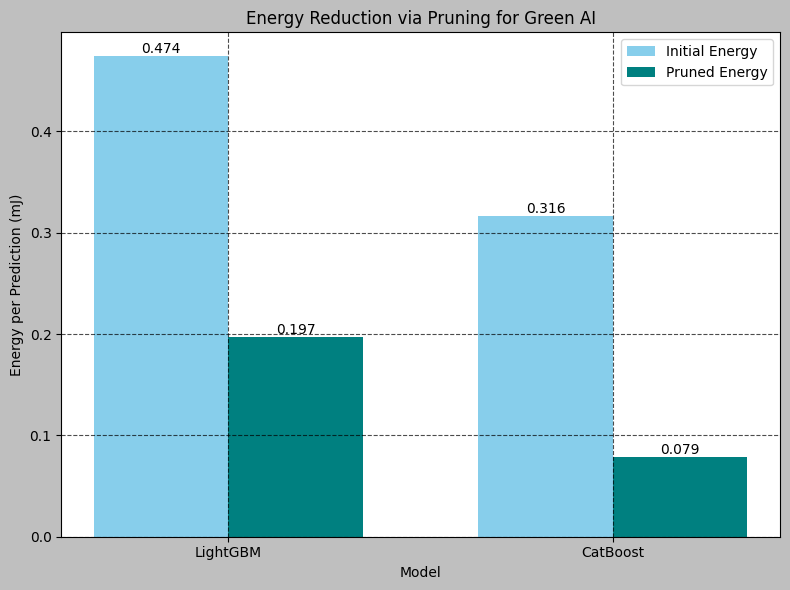

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
models = ['LightGBM', 'CatBoost']
initial_energy_mj = [0.000474 * 1000, 0.000316 * 1000]  # Convert J to mJ
pruned_energy_mj = [0.000197 * 1000, 0.000079 * 1000]    # Convert J to mJ

# Set up the bar chart
x = np.arange(len(models))  # Positions for bars
width = 0.35  # Width of bars

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, initial_energy_mj, width, label='Initial Energy', color='skyblue')
bars2 = ax.bar(x + width/2, pruned_energy_mj, width, label='Pruned Energy', color='teal')

# Customize the chart
ax.set_xlabel('Model')
ax.set_ylabel('Energy per Prediction (mJ)')
ax.set_title('Energy Reduction via Pruning for Green AI')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, which='both', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.3f}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.3f}', ha='center', va='bottom')

# Adjust layout and save
plt.tight_layout()
plt.savefig('energy_reduction_chart.png', dpi=300)
plt.show()

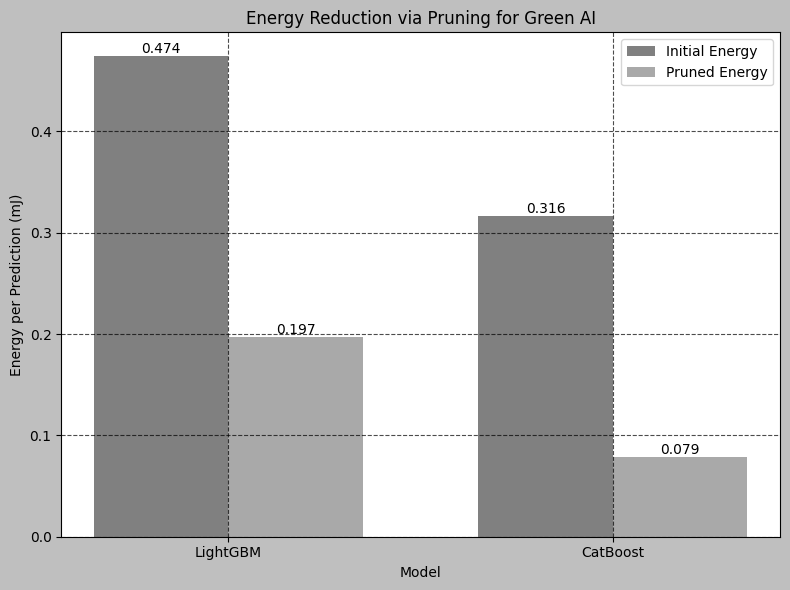

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Set Matplotlib to grayscale mode for black and white output
plt.style.use('grayscale')

# Data for the chart
models = ['LightGBM', 'CatBoost']
initial_energy_mj = [0.000474 * 1000, 0.000316 * 1000]  # Convert J to mJ: [0.474, 0.316]
pruned_energy_mj = [0.000197 * 1000, 0.000079 * 1000]    # Convert J to mJ: [0.197, 0.079]

# Set up the bar chart
x = np.arange(len(models))  # Positions for bars
width = 0.35  # Width of bars

fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x - width/2, initial_energy_mj, width, label='Initial Energy', color='gray')
bars2 = ax.bar(x + width/2, pruned_energy_mj, width, label='Pruned Energy', color='darkgray')

# Customize the chart
ax.set_xlabel('Model')
ax.set_ylabel('Energy per Prediction (mJ)')
ax.set_title('Energy Reduction via Pruning for Green AI')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.grid(True, which='both', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.3f}', ha='center', va='bottom')
for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.3f}', ha='center', va='bottom')

# Adjust layout and save
plt.tight_layout()
plt.savefig('energy_reduction_chart_bw.png', dpi=300)
plt.show()

In [ ]:
print("\nSimulating Edge Deployment...")
energy_results = []
for model_name, model in [('LightGBM', lgb_pruned), ('CatBoost', cat_pruned)]:
    try:
        start_time = time.time()
        predictions = model.predict(X_test_encoded)
        inference_time = time.time() - start_time
        energy = 5 * inference_time / len(X_test_encoded)  # Joules per sample (5W Raspberry Pi)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        energy_results.append({
            'Model': model_name,
            'Inference_Time_ms': inference_time * 1000 / len(X_test_encoded),
            'Energy_Consumption_Joules': energy,
            'RMSE': rmse
        })
        print(f"{model_name}: Inference Time per sample: {inference_time*1000/len(X_test_encoded):.2f} ms, "
              f"Energy: {energy:.6f} J, RMSE: {rmse:.6f}")
    except Exception as e:
        print(f"Edge simulation error for {model_name}: {e}")


Simulating Edge Deployment...
LightGBM: Inference Time per sample: 0.03 ms, Energy: 0.000131 J, RMSE: 0.361016
CatBoost: Inference Time per sample: 0.01 ms, Energy: 0.000054 J, RMSE: 0.580417


In [ ]:
energy_df = pd.DataFrame(energy_results)
energy_df.to_csv('energy_results.csv', index=False)
files.download('energy_results.csv')
print("Energy results saved to energy_results.csv")

# Update results dictionary
results['real_time_results'] = real_time_results
results['scenario_results'] = scenario_results
results['energy_results'] = energy_results
np.save('final_results_.npy', results)
files.download('final_results_.npy')
print("Final results saved to final_results_.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Energy results saved to energy_results.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Final results saved to final_results_.npy


In [ ]:
import pandas as pd
energy_df = pd.read_csv('energy_results.csv')
print(energy_df)

      Model  Inference_Time_ms  Energy_Consumption_Joules      RMSE
0  LightGBM           0.026214                   0.000131  0.361016
1  CatBoost           0.010898                   0.000054  0.580417
